In [127]:
import pandas as pd
import matplotlib.pyplot as plt

racesCreateDateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y')
racesCreated = pd.read_csv("races.csv", sep=";",parse_dates=['race_created'],date_parser=racesCreateDateparse, usecols=['id','race_created'])
racesCreated.dropna(how="all")
createdRacesSize = racesCreated['race_created'].size
createdRacesSize

#read csv
#allRaces = pd.read_csv("races.csv")
#allRaces.size

166609

In [128]:
drivenRaces = pd.read_csv("races.csv", sep=";", usecols=['id','race_driven'])
#drivenRaces.dropna(how="all")

#validate dataframe
drivenRacesWithValidTimeStamps = drivenRaces.loc[drivenRaces['race_driven'] != "0000-00-00 00:00:00"]
drivenRacesSize = drivenRacesWithValidTimeStamps['race_driven'].size
drivenRacesSize

109099

In [129]:
createdButNotDrivenRaces = createdRacesSize - drivenRacesSize
createdButNotDrivenRaces

57510

### Absprungrate von ca 30 %

In [130]:
firstCreatedRace = min(racesCreated['race_created'])
firstCreatedRace

Timestamp('2012-03-06 00:00:00')

In [131]:
lastCreatedRace = max(racesCreated['race_created'])
lastCreatedRace

Timestamp('2017-06-27 00:00:00')

In [132]:
#maximal erstellte Rennen
max(racesCreated['race_created'].value_counts().sort_index())

1303

In [133]:
createdButNotDrivenRaces

57510

In [155]:
sumOfSameRacesAtOneDay = racesCreated['race_created'].value_counts()
sumOfSameRacesAtOneDay.head().to_frame()

,race_created
2012-03-08,1303
2012-03-07,1158
2012-12-11,938
2012-12-17,922
2012-03-06,891


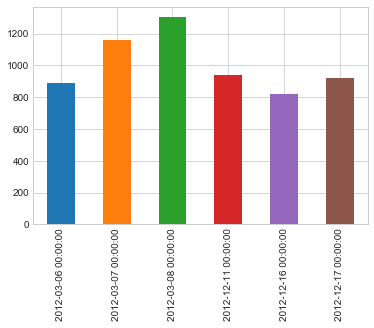

In [180]:
#top 5, wo am meisten Rennen erstellt worden sind
sumOfSameRacesAtOneDay.loc[lambda x : x>800].sort_index().plot.bar()

In [187]:
test = racesCreated['race_created'].value_counts().sort_index().reset_index()
test.race_created


0        891
1       1158
2       1303
3        799
4        750
5        733
6        762
7        711
8        532
9        650
10       474
11       561
12       399
13       407
14       333
15       295
16       240
17       142
18       207
19       267
20       297
21       327
22       242
23       270
24       197
25       173
26       183
27       270
28       200
29       174
        ... 
1584       2
1585       3
1586       3
1587       1
1588       2
1589       6
1590       4
1591       1
1592       6
1593       8
1594       1
1595       1
1596       1
1597       4
1598       3
1599       2
1600       3
1601       3
1602       1
1603       3
1604       2
1605       3
1606       3
1607       1
1608       1
1609       3
1610       2
1611       1
1612       1
1613       1
Name: race_created, Length: 1614, dtype: int64

In [188]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

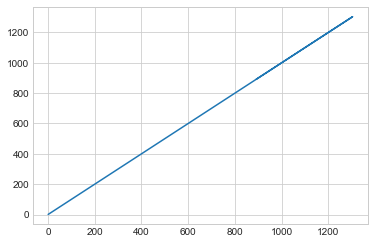

In [189]:
fig = plt.figure()
ax = plt.axes()
plt.plot(test.race_created,test.race_created+0,linestyle='solid')